# Predicting Passenger Satisfaction for F5 Airlines: A Data-Driven Approach
This project aims to develop a model that accurately predicts passenger satisfaction for F5 Airlines. Understanding the factors that drive satisfaction is crucial for the airline to improve its services and enhance customer experience.

Our Approach:

We will employ a data-driven approach, starting with a thorough Exploratory Data Analysis (EDA). This crucial first step will involve:

*Data Cleaning: Identifying and handling missing values, outliers, and inconsistencies in the dataset.
*Descriptive Statistics: Calculating key summary statistics (mean, median, standard deviation, etc.) to understand the distribution and central tendencies of different variables.
*Data Visualization: Creating insightful visualizations (histograms, scatter plots, box plots, etc.) to uncover patterns, relationships, and potential insights hidden within the data.
*Feature Engineering: Exploring potential new features from existing ones to enhance model accuracy and interpretability.
By thoroughly understanding the data through EDA, we can identify key factors influencing passenger satisfaction and build a robust and accurate predictive model. This model will empower F5 Airlines to make data-driven decisions, optimize its services, and ultimately, enhance passenger satisfaction.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### EDA custom functions (originally extracted from Spaceship Titanic)

In [17]:
def plot_categorical_barh(df: pd.DataFrame, 
                     col: str, 
                     title: str,
                     figsize: tuple = (10,5),
                     color: list = ['b']) -> None:
  '''Generate hbar plot of one categorical dataframe feature

  Args:
    df: pandas DataFrame containing the data 
    col: categorical column to produce the barh chart 
    title: title of the barh chart 
    figsize: tuple containing chart dimensions; defaults to (10,5)
    color: chart color; defaults to blue 

  Returns:
    no object returned; plots the barh chart 
  '''
  (
    df[col]
    .value_counts(normalize=True)
    .sort_values(ascending=True)
    .plot(kind='barh',
          figsize=figsize,
          title=title,
          color=color)
  )

  plt.show()


In [25]:
def plot_satisfaction_pct(df: pd.DataFrame, 
                        col: str, 
                        title: str,
                        figsize: tuple = (10,5),
                        color: str = 'r') -> None:
    
  '''Generate a horizontal bar chart of satisfaction percentage for a category

  Args:
    df: pandas dataframe containing the data 
    col: column to analyze satisfaction percentage 

  Returns:
    None; plots a chart of the pct of satisfied passengers
  '''

  (
    df[[col, 'satisfaction']]
    .replace({'satisfaction': {'neutral or dissatisfied': 0, 'satisfied': 1}})
    .groupby(col)
    .agg('mean')
    .sort_values('satisfaction')
    .plot(kind='barh',
          figsize=figsize,
          color = color,
          title=title)
  )
  plt.show()


### Importar los datos originales a un dataframe de pandas

In [2]:
# read in the data
df = pd.read_csv('data/airline_passenger_satisfaction.csv')

## Comenzamos el EDA

In [11]:
df.shape

(103904, 25)

In [12]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### Estadísticas descriptivas

#### Análisis cuántitativo

In [7]:
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51952.0,29995.0,0.0,25976.0,51952.0,77927.0,103903.0
id,103904.0,64924.0,37464.0,1.0,32534.0,64856.0,97368.0,129880.0
Age,103904.0,39.0,15.0,7.0,27.0,40.0,51.0,85.0
Flight Distance,103904.0,1189.0,997.0,31.0,414.0,843.0,1743.0,4983.0
Inflight wifi service,103904.0,3.0,1.0,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103904.0,3.0,2.0,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103904.0,3.0,1.0,0.0,2.0,3.0,4.0,5.0
Gate location,103904.0,3.0,1.0,0.0,2.0,3.0,4.0,5.0
Food and drink,103904.0,3.0,1.0,0.0,2.0,3.0,4.0,5.0
Online boarding,103904.0,3.0,1.0,0.0,2.0,3.0,4.0,5.0


#### Analisis de datos categóricos

In [8]:
df.describe(include='object').round().T

,count,unique,top,freq
Gender,103904,2,Female,52727
Customer Type,103904,2,Loyal Customer,84923
Type of Travel,103904,2,Business travel,71655
Class,103904,3,Business,49665
satisfaction,103904,2,neutral or dissatisfied,58879


### Revisión de datos nulos

Percentage of missing data:



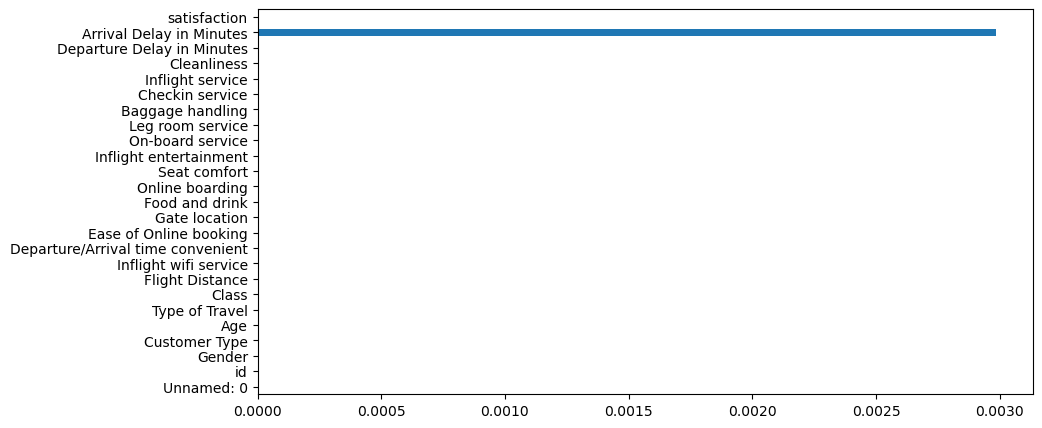

In [9]:
print('Percentage of missing data:\n')
df.isna().mean().plot(kind='barh',figsize=(10,5))
plt.show()
print('')

In [13]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Distinct values in column '{column}':")
    print(unique_values)
    print("-" * 20)  # Separator for clarity


Distinct values in column 'Unnamed: 0':
[     0      1      2 ... 103901 103902 103903]
--------------------
Distinct values in column 'id':
[ 70172   5047 110028 ...  68825  54173  62567]
--------------------
Distinct values in column 'Gender':
['Male' 'Female']
--------------------
Distinct values in column 'Customer Type':
['Loyal Customer' 'disloyal Customer']
--------------------
Distinct values in column 'Age':
[13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]
--------------------
Distinct values in column 'Type of Travel':
['Personal Travel' 'Business travel']
--------------------
Distinct values in column 'Class':
['Eco Plus' 'Business' 'Eco']
--------------------
Distinct values in column 'Flight Distance':
[ 460  235 1142 ...  974 1479  400]
--------------------
Distinct values in column 'Inflight w

Análisis. Dados los pocos datos nulos que hay y que tampoco parece que hay algún nulo camuflado como valor, una opción es la de eliminar las filas directamente

In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(103594, 25)

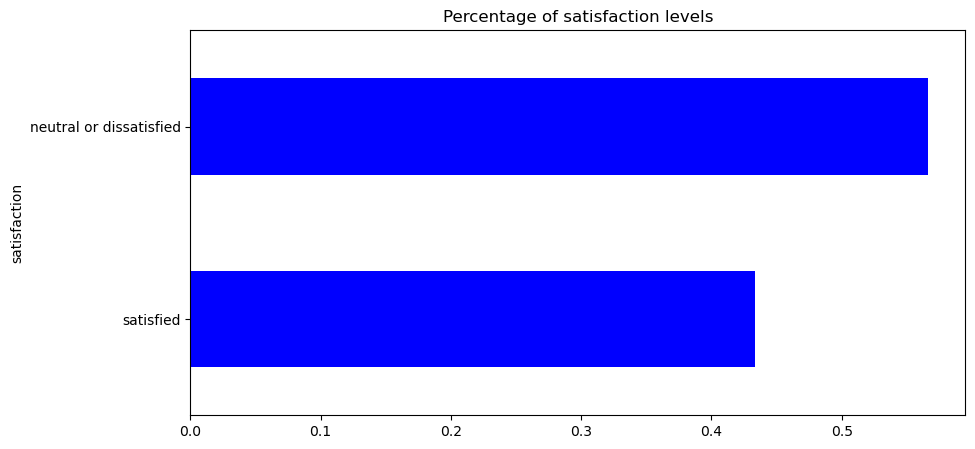

In [19]:
plot_categorical_barh(df=df, col='satisfaction', title='Percentage of satisfaction levels')

### Análisis de impacto discriminador en las diferentes categorias

C:\Users\jvazq\AppData\Local\Temp\ipykernel_1316\3381132561.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'satisfaction': {'neutral or dissatisfied': 0, 'satisfied': 1}})


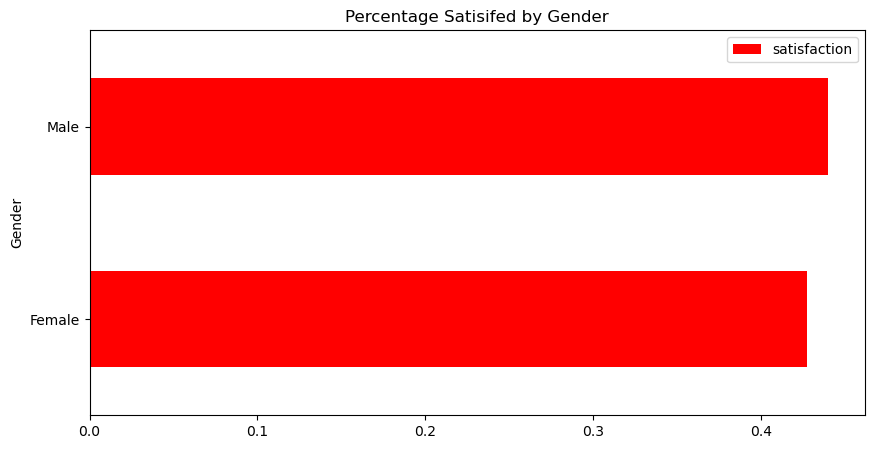

In [30]:
plot_satisfaction_pct(df=df, 
                     col='Gender',
                     title='Percentage Satisifed by Gender')

#### Convertir las características de evaluación numérica en categóricas

In [32]:
for col in ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
            'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment',
            'On-board service', 'Leg room service','Checkin service', 'Inflight service',
            'Cleanliness']:

    df[col] = pd.Categorical(df[col], categories=[0, 1, 2, 3, 4, 5], ordered=True)

for col in ['Baggage handling']:

    df[col] = pd.Categorical(df[col], categories=[1, 2, 3, 4, 5], ordered=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103594 non-null  object  
 1   Customer Type                      103594 non-null  object  
 2   Age                                103594 non-null  int64   
 3   Type of Travel                     103594 non-null  object  
 4   Class                              103594 non-null  object  
 5   Flight Distance                    103594 non-null  int64   
 6   Inflight wifi service              103594 non-null  category
 7   Departure/Arrival time convenient  103594 non-null  category
 8   Ease of Online booking             103594 non-null  category
 9   Gate location                      103594 non-null  category
 10  Food and drink                     103594 non-null  category
 11  Online boarding                

#### Drop id columns Unnamed: 0 and id

In [34]:
df = df.drop(df.columns[[0, 1]], axis=1) 


#### Handling features with too many distinct values like flight distance

In [36]:
# Capping outliers using percentiles
#df['flight_distance'] = np.clip(df['flight_distance'], df['flight_distance'].quantile(0.01), df['flight_distance'].quantile(0.99))

# Log transformation
df['Log Flight Distance'] = np.log1p(df['Flight Distance'])  # log1p to handle zero values


In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()  # or MinMaxScaler()
df['Scaled Flight Distance'] = scaler.fit_transform(df[['Flight Distance']])

In [39]:
df = df.drop(['Log Flight Distance', 'Scaled Flight Distance'], axis=1)

#### Reviewing correlation of delays with satisfaction

In [41]:
df['satisfaction_binary'] = df['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})


In [42]:
correlation_departure_delay = df['Departure Delay in Minutes'].corr(df['satisfaction_binary'])
correlation_arrival_delay = df['Arrival Delay in Minutes'].corr(df['satisfaction_binary'])
print(f"Correlation of departure delay with target: {correlation_departure_delay}")
print(f"Correlation of arrival delay with target: {correlation_arrival_delay}")

Correlation of departure delay with target: -0.050515080224791085
Correlation of arrival delay with target: -0.05758182372580995


In [43]:

df = df.drop(['satisfaction_binary'], axis=1)

In [44]:
df.to_csv('data/f5_airlines_after_eda.csv', index=False) 


### Model training